# Comparing model predictions

The purpose of this notebook is to see how the models are differing in their predictions.

In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('../data/Final Data/start_to_finish_with_preds.csv')

In [91]:
df.head()

,Y,M,home_team,away_team,home_elo,away_elo,home_avg,away_avg,home_obp,away_obp,...,log_5,xgb_pred,knn_pred,knn_no_batting_pred,nn_pred,xgb_proba,knn_proba,knn_no_batting_proba,nn_proba,home_win
0,2016,4,PIT,SLN,1533.1644,1526.7958,0.252810,0.246971,0.317378,0.316181,...,0.5,1.0,0.0,0.0,0,0.573355,0.500000,0.500000,0.451368,1.0
1,2016,4,TBA,TOR,1508.5856,1543.1775,0.246346,0.260793,0.309376,0.332750,...,0.5,0.0,0.0,0.0,1,0.485874,0.486667,0.500000,0.510085,0.0
2,2016,4,KCA,NYN,1542.5957,1524.7207,0.262548,0.239915,0.317525,0.307705,...,0.5,1.0,0.0,0.0,0,0.641917,0.500000,0.493333,0.495330,1.0
3,2016,4,OAK,CHA,1488.3344,1489.9082,0.246621,0.244771,0.308523,0.302390,...,0.5,1.0,1.0,1.0,0,0.546191,0.526667,0.540000,0.427996,0.0
4,2016,4,ANA,CHN,1509.8676,1526.6748,0.240166,0.239208,0.301890,0.316835,...,0.5,0.0,1.0,1.0,0,0.468664,0.506667,0.506667,0.468577,0.0


## Column distribution by model

In [115]:
df['xgb_correct'] = df['home_win'] == df['xgb_pred']
df['knn_correct'] = df['home_win'] == df['knn_pred']
df['knn_no_batting_correct'] = df['home_win'] == df['knn_no_batting_pred']
df['nn_correct'] = df['home_win'] == df['nn_pred']

In [116]:
def adjust_proba(x):
    if x > 0.5:
        return 2*(x - 0.5)
    else:
        return 2*(1 - x - 0.5)

In [117]:
df['xgb_proba_majority'] = df['xgb_proba'].apply(adjust_proba)
df['knn_proba_majority'] = df['knn_proba'].apply(adjust_proba)
df['knn_no_batting_proba_majority'] = df['knn_no_batting_proba'].apply(adjust_proba)
df['nn_proba_majority'] = df['nn_proba'].apply(adjust_proba)

In [118]:
df.head()

,Y,M,home_team,away_team,home_elo,away_elo,home_avg,away_avg,home_obp,away_obp,...,nn_proba,home_win,xgb_correct,knn_correct,knn_no_batting_correct,nn_correct,xgb_proba_majority,knn_proba_majority,knn_no_batting_proba_majority,nn_proba_majority
0,2016,4,PIT,SLN,1533.1644,1526.7958,0.252810,0.246971,0.317378,0.316181,...,0.615994,1.0,False,False,False,True,0.094638,0.000000,0.000000,0.231988
1,2016,4,TBA,TOR,1508.5856,1543.1775,0.246346,0.260793,0.309376,0.332750,...,0.446586,0.0,True,True,True,True,0.245543,0.013333,0.000000,0.106828
2,2016,4,KCA,NYN,1542.5957,1524.7207,0.262548,0.239915,0.317525,0.307705,...,0.588885,1.0,True,False,False,True,0.259434,0.000000,0.000000,0.177770
3,2016,4,OAK,CHA,1488.3344,1489.9082,0.246621,0.244771,0.308523,0.302390,...,0.503614,0.0,False,False,False,False,0.145007,0.066667,0.080000,0.007228
4,2016,4,ANA,CHN,1509.8676,1526.6748,0.240166,0.239208,0.301890,0.316835,...,0.609053,0.0,False,False,False,False,0.031748,0.013333,0.026667,0.218106


In [119]:
xgb_correct = df[df['xgb_pred'] == df['home_win']]
xgb_wrong = df[df['xgb_pred'] != df['home_win']]

knn_correct = df[df['knn_pred'] == df['home_win']]
knn_wrong = df[df['knn_pred'] != df['home_win']]

knn_no_batting_correct = df[df['knn_no_batting_pred'] == df['home_win']]
knn_no_batting_wrong = df[df['knn_no_batting_pred'] != df['home_win']]

nn_correct = df[df['nn_pred'] == df['home_win']]
nn_wrong = df[df['nn_pred'] != df['home_win']]

In [120]:
cols = list(df.columns)
cols = [c for c in cols if c.endswith('_diff')] + ['log_5']

In [98]:
def plot_density_by_model(model_correct, model_wrong):
    for c in cols:
        plt.figure(figsize=(12, 8))
        plt.hist(model_correct[c], label='Correct', alpha=0.5, density=True)
        plt.hist(model_wrong[c], label='Wrong', alpha=0.5, density=True)
        plt.legend()
        plt.title(c)
        plt.show();

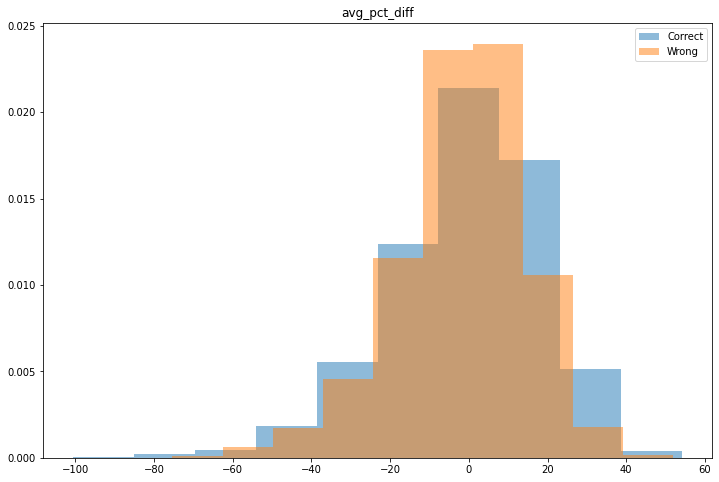

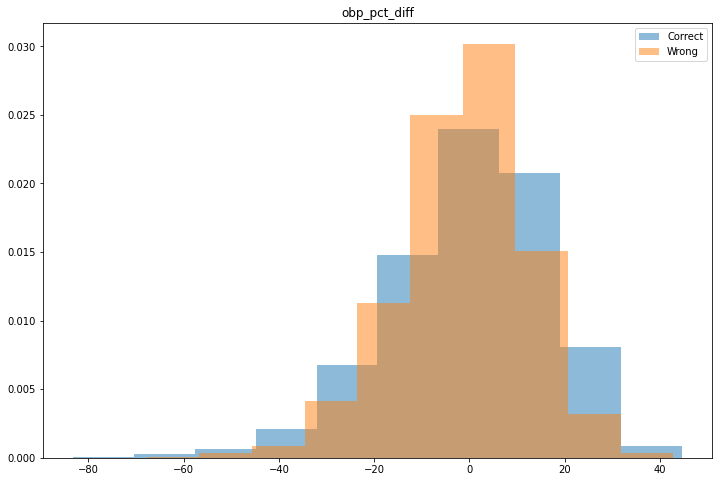

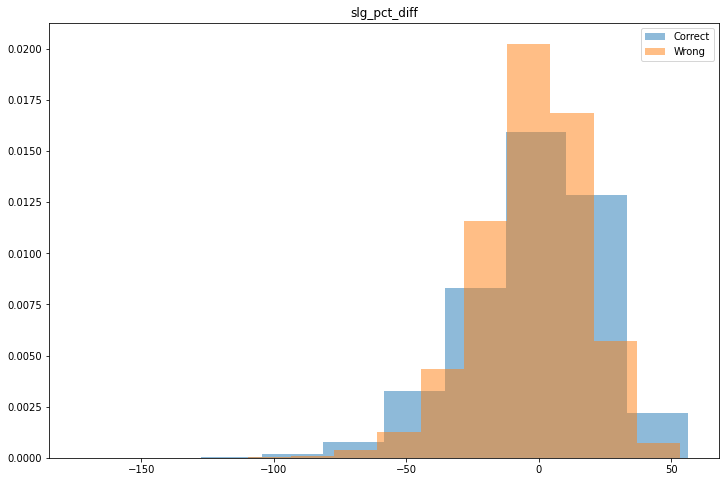

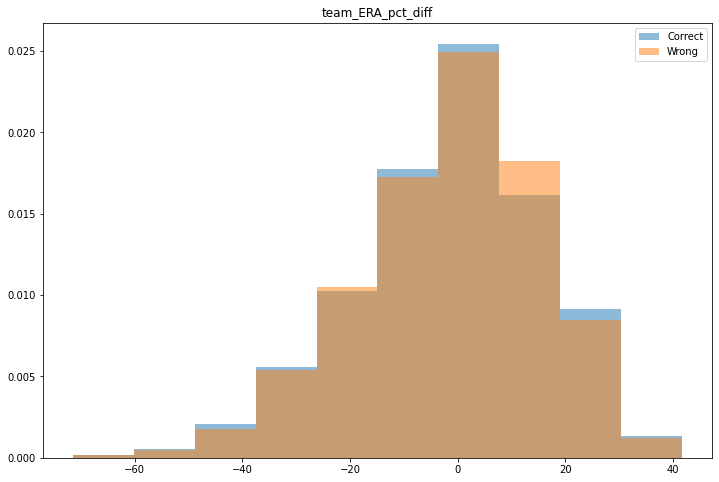

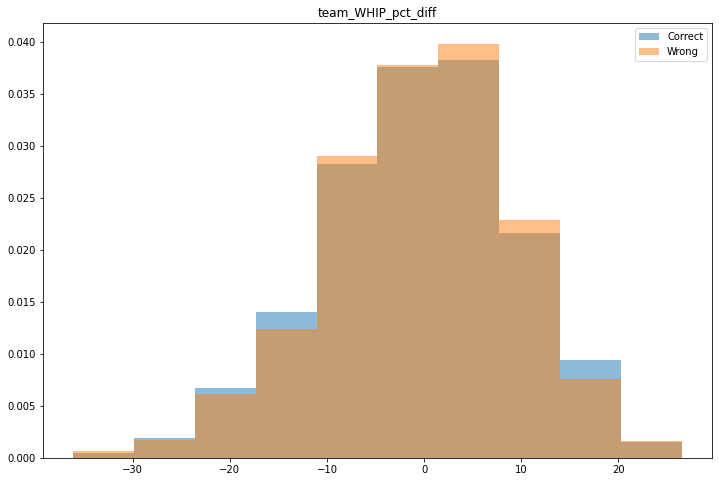

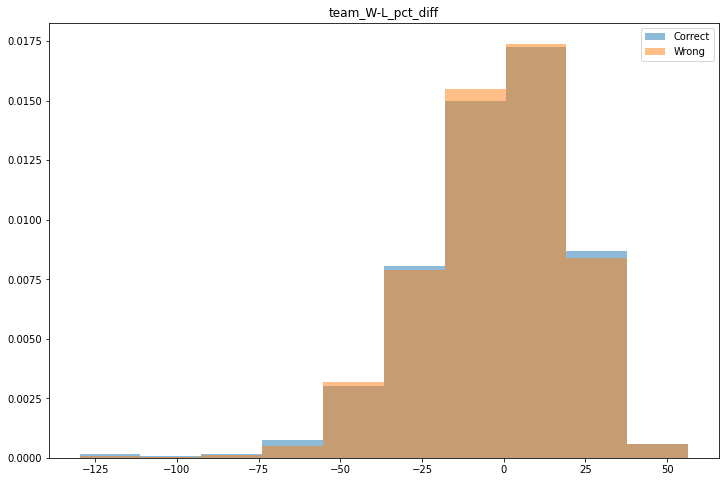

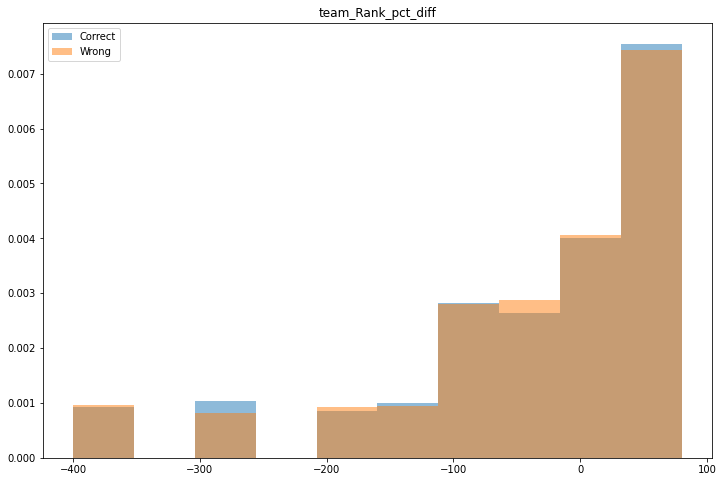

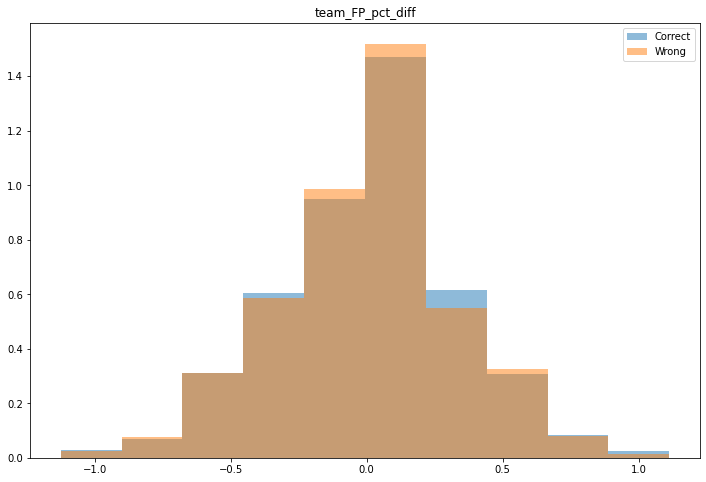

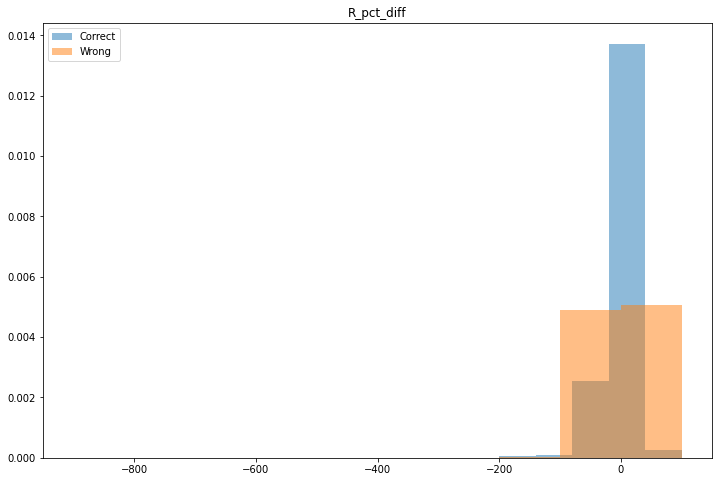

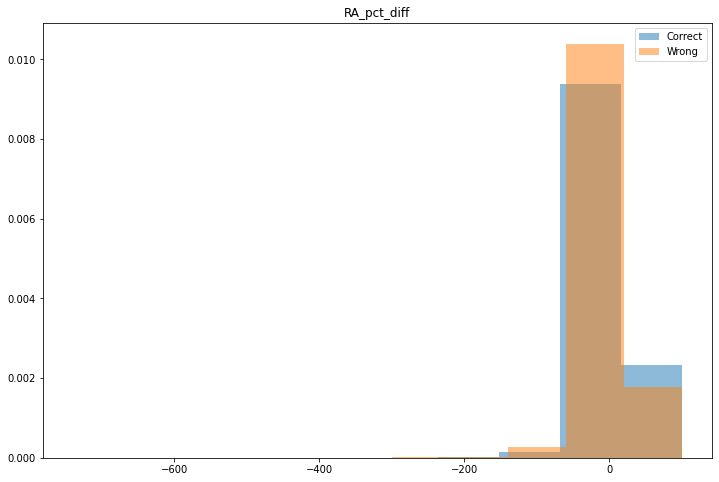

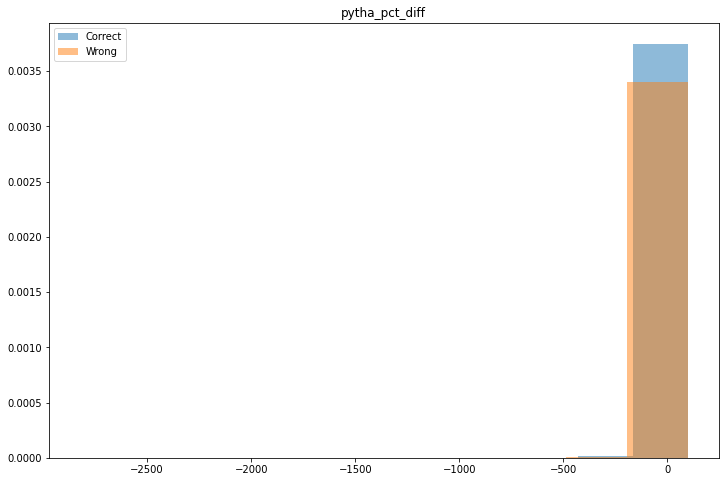

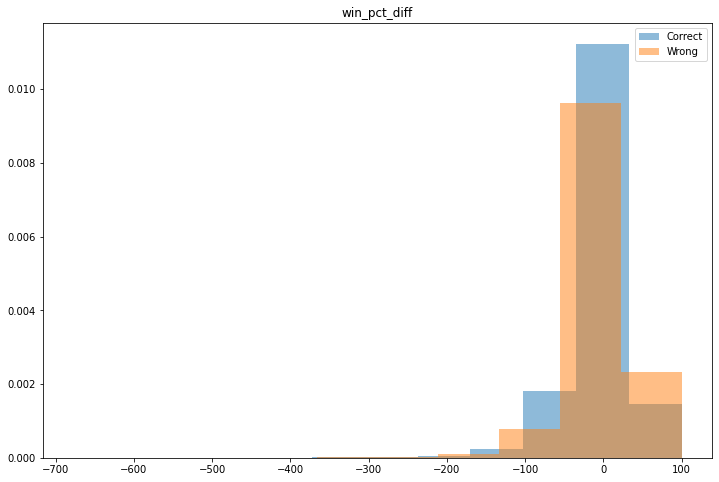

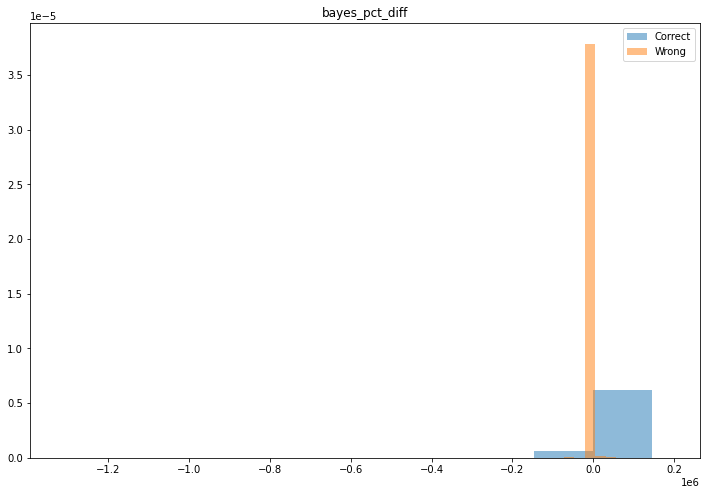

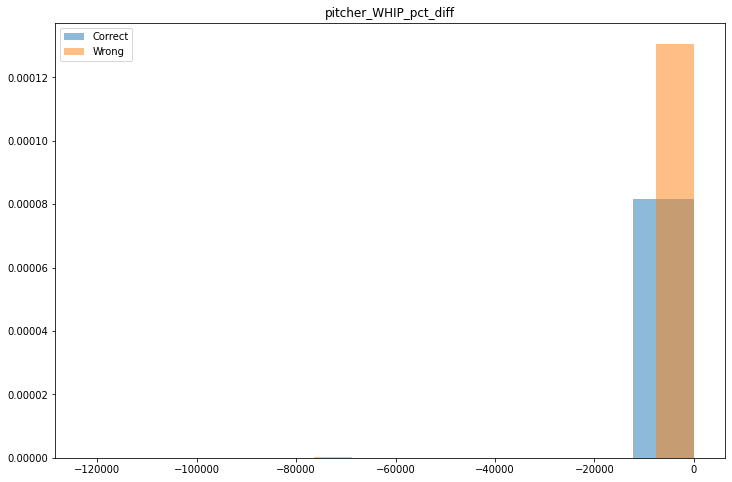

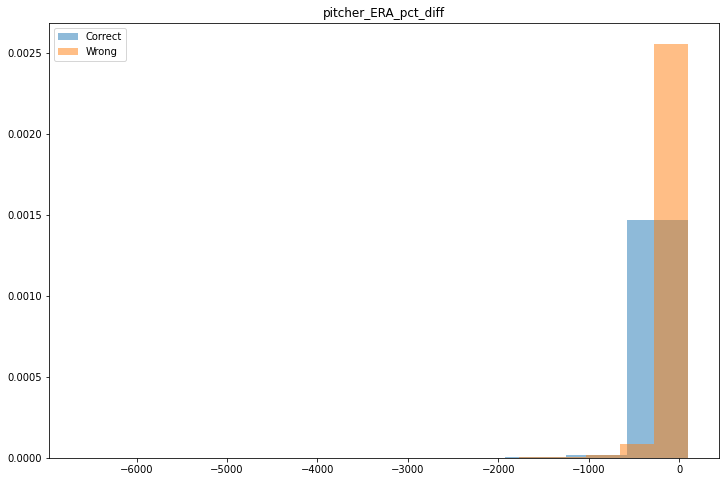

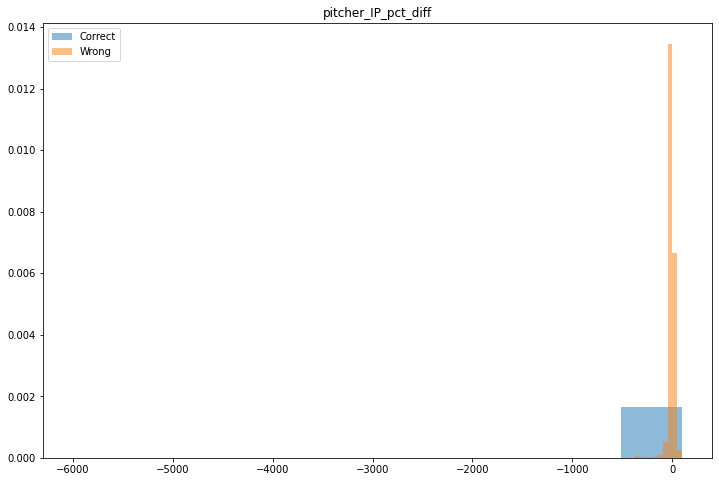

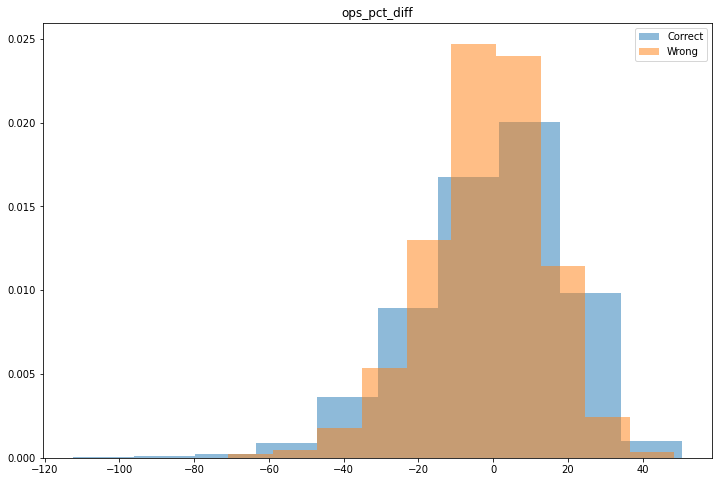

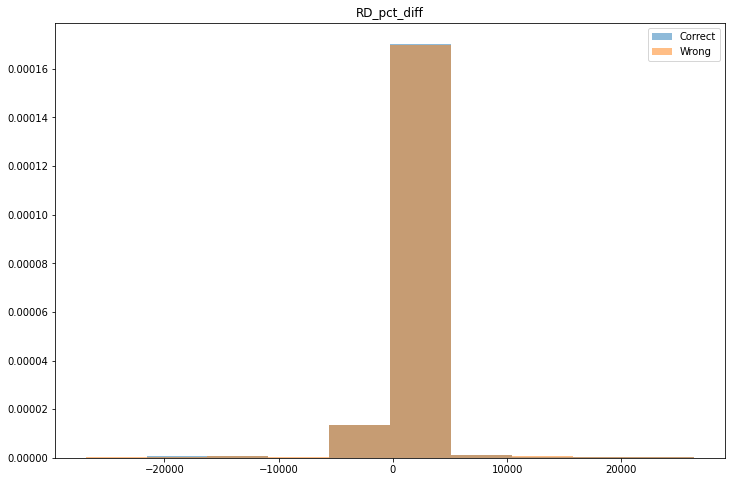

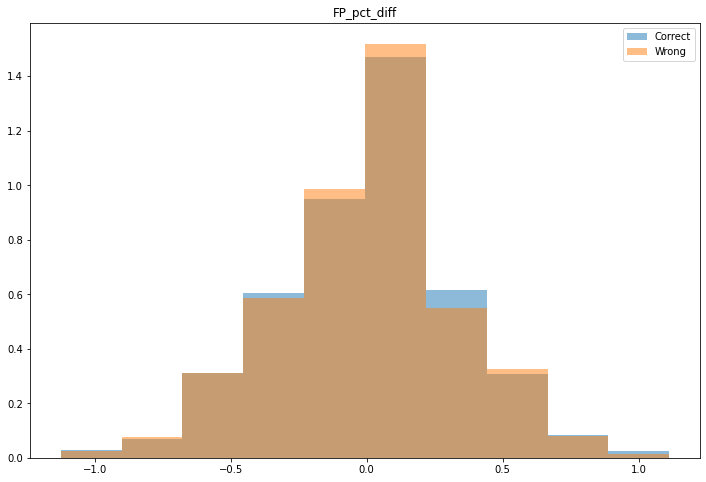

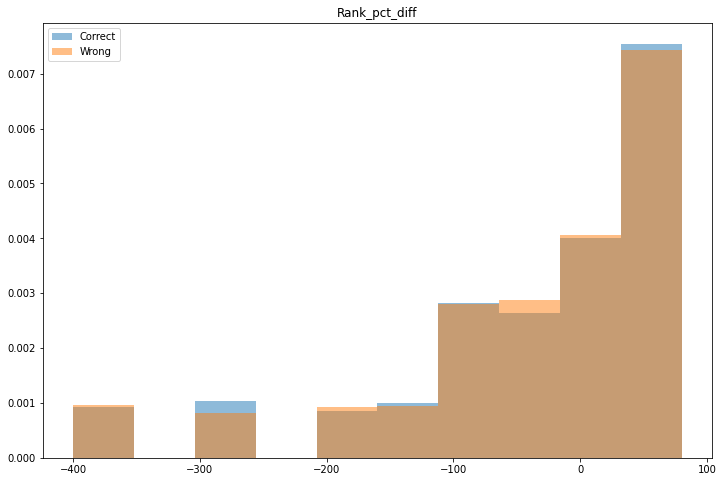

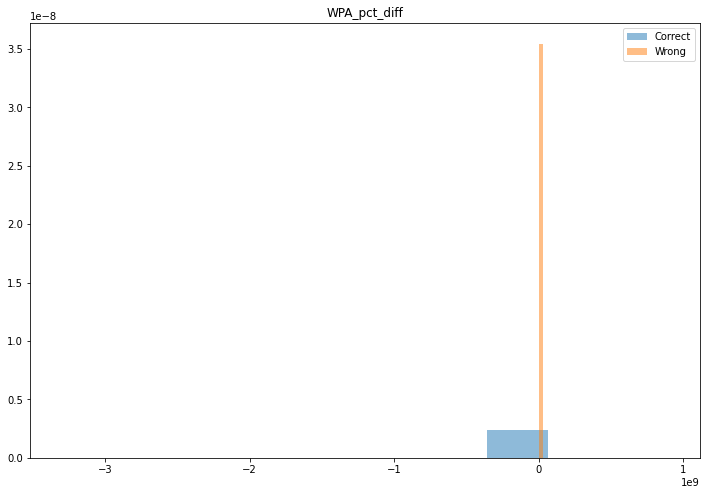

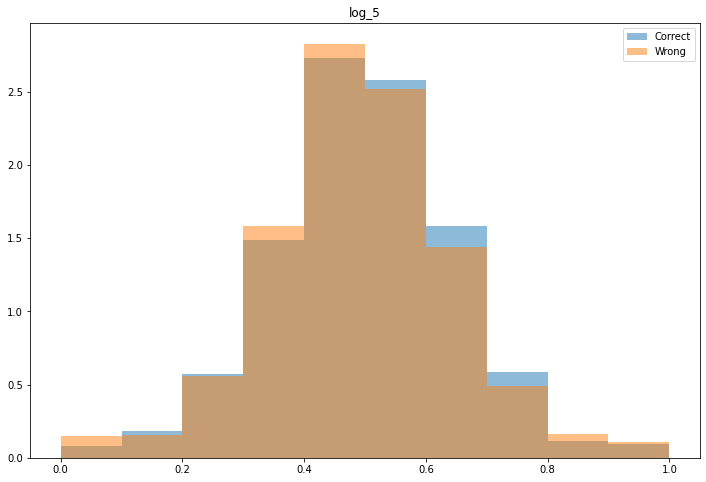

In [14]:
plot_density_by_model(xgb_correct, xgb_wrong)

In [17]:
def plot_density_across_models(col):
    models_correct = [xgb_correct, knn_correct, nn_correct]
    models_wrong = [xgb_wrong, knn_wrong, nn_wrong]
    models_labels = ['XGB', 'KNN', 'NN']
        
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_correct):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} correct')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_wrong):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} wrong')
    plt.show();

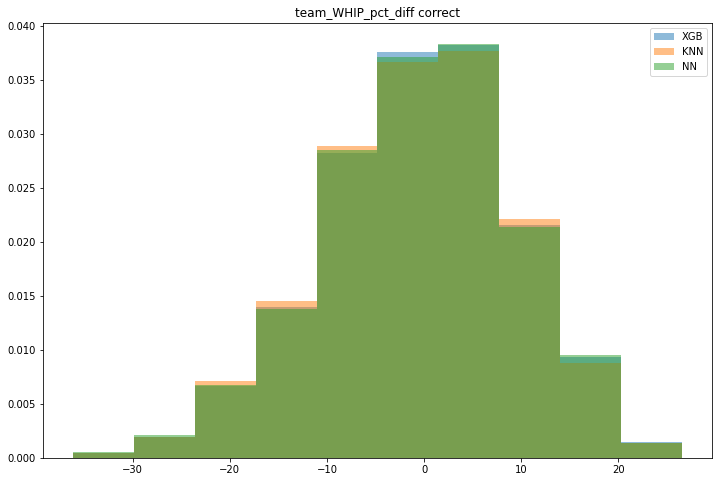

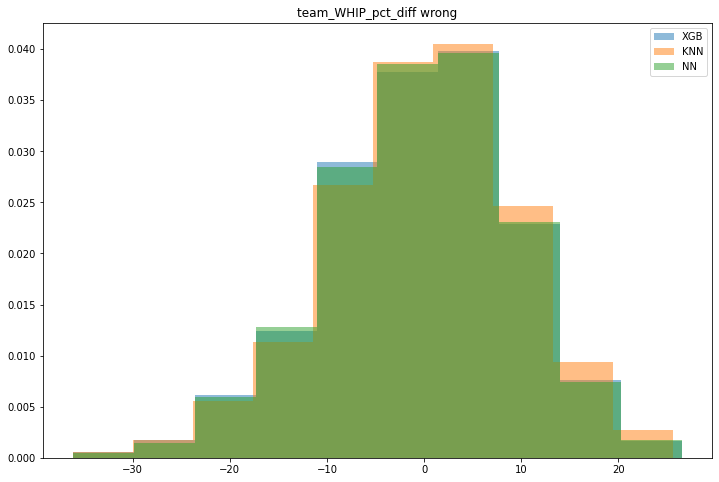

In [20]:
plot_density_across_models('team_WHIP_pct_diff')

## Accuracy by team

In [26]:
df['xgb_correct'] = (df['home_win'] == df['xgb_pred']).astype(bool)
df['knn_correct'] = (df['home_win'] == df['knn_pred']).astype(bool)
df['nn_correct'] = (df['home_win'] == df['nn_pred']).astype(bool)

In [27]:
df.head()

,home_team,away_team,Y,M,avg_pct_diff,obp_pct_diff,slg_pct_diff,team_ERA_pct_diff,team_WHIP_pct_diff,team_W-L_pct_diff,...,Rank_pct_diff,WPA_pct_diff,log_5,home_win,xgb_pred,knn_pred,nn_pred,xgb_correct,knn_correct,nn_correct
0,KCA,NYN,2016,4,8.620726,3.092675,2.578581,7.754011,8.007859,5.263158,...,0.000000,96.381239,0.5,1,1,1,1,True,True,True
1,PIT,SLN,2016,4,2.309712,0.376945,-0.040732,8.978328,-1.211283,-2.040816,...,50.000000,96.381239,0.5,1,1,1,1,True,True,True
2,TBA,TOR,2016,4,-5.864577,-7.555239,-12.023378,-1.871658,1.468752,-16.250000,...,75.000000,96.381239,0.5,0,0,1,1,True,False,False
3,ANA,CHN,2016,4,0.398896,-4.950458,-0.794957,14.720812,8.900281,-14.117647,...,0.000000,96.381239,0.5,0,0,1,1,True,False,False
4,ARI,COL,2016,4,-1.095675,2.427164,-5.196744,-24.444444,-13.778463,13.924051,...,-66.666667,96.381239,0.5,0,1,1,1,False,False,False


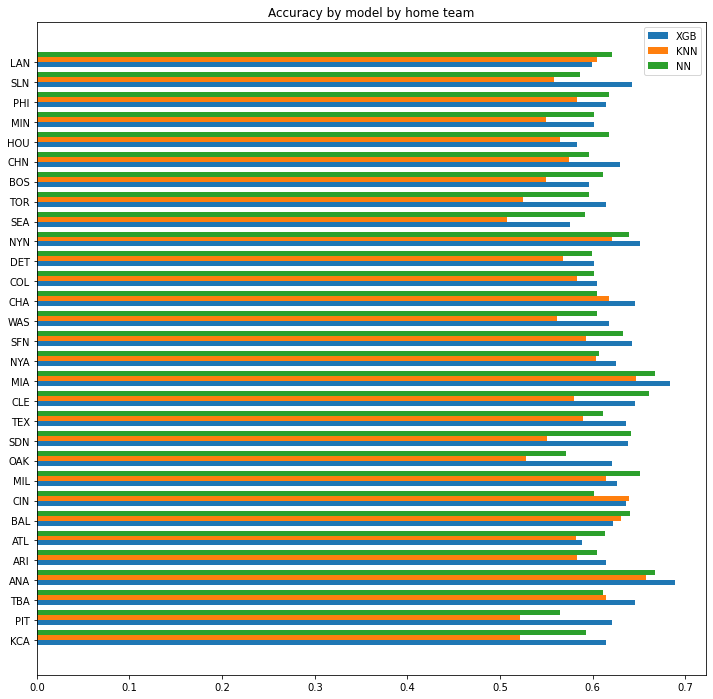

In [44]:
N = df['home_team'].nunique()
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(12, 12))
plt.barh(ind, df.groupby('home_team')['xgb_correct'].mean().values, width, label='XGB')
plt.barh(ind + width, df.groupby('home_team')['knn_correct'].mean().values, width, label='KNN')
plt.barh(ind + 2*width, df.groupby('home_team')['nn_correct'].mean().values, width, label='NN')

plt.yticks(ind + width / 2, df['home_team'].unique())
plt.legend()
plt.title('Accuracy by model by home team');

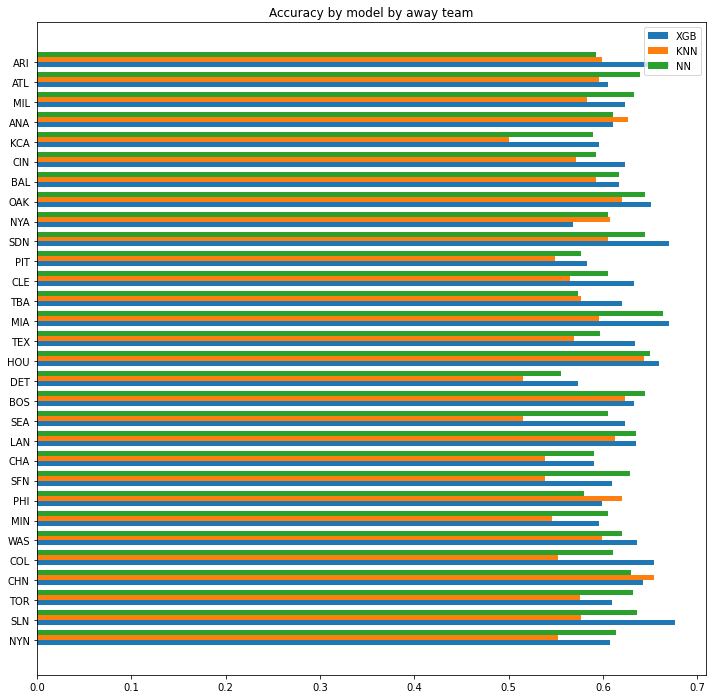

In [46]:
N = df['away_team'].nunique()
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(12, 12))
plt.barh(ind, df.groupby('away_team')['xgb_correct'].mean().values, width, label='XGB')
plt.barh(ind + width, df.groupby('away_team')['knn_correct'].mean().values, width, label='KNN')
plt.barh(ind + 2*width, df.groupby('away_team')['nn_correct'].mean().values, width, label='NN')

plt.yticks(ind + width / 2, df['away_team'].unique())
plt.legend()
plt.title('Accuracy by model by away team');

## Heatmap of model accuracy by year by team

In [53]:
model_acc = df.groupby(['Y', 'home_team'])[['xgb_correct', 'knn_correct', 'nn_correct']].mean()

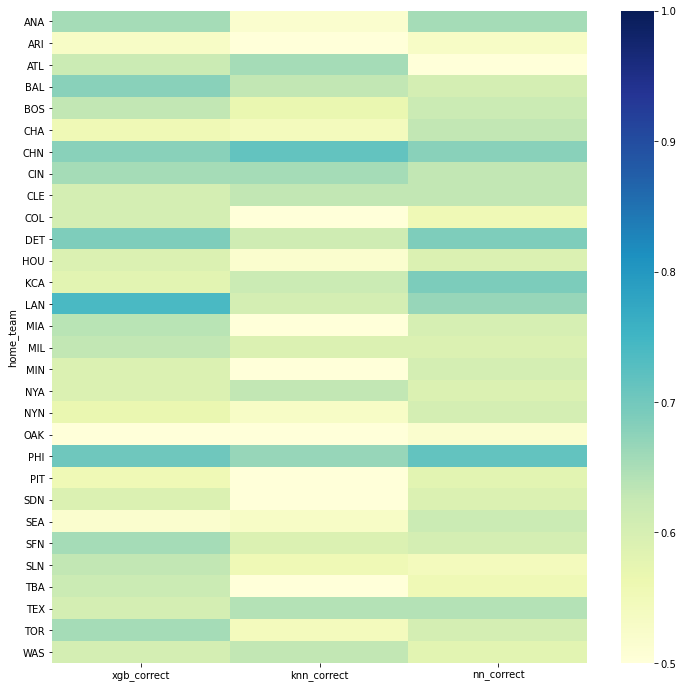

In [64]:
plt.figure(figsize=(12, 12))
sns.heatmap(model_acc.loc[2016], vmin=0.5, vmax=1, cmap="YlGnBu");

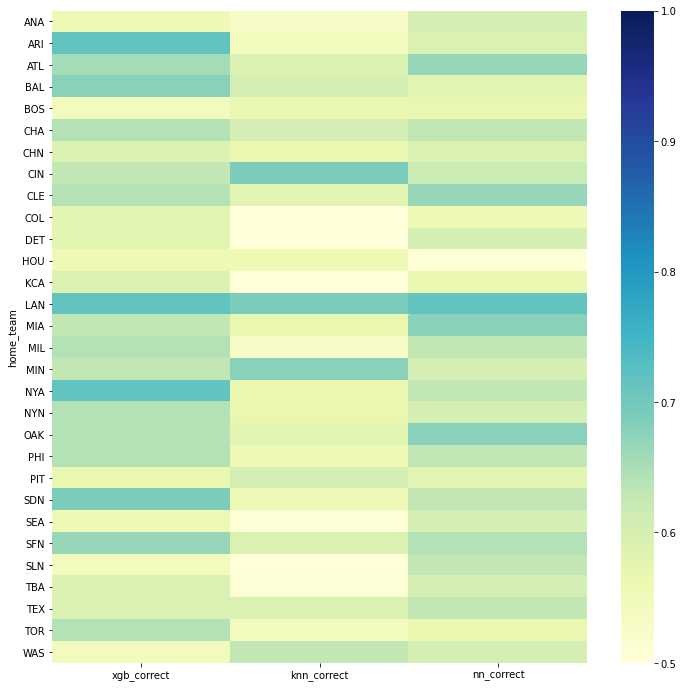

In [65]:
plt.figure(figsize=(12, 12))
sns.heatmap(model_acc.loc[2017], vmin=0.5, vmax=1, cmap="YlGnBu");

## Predicted probabilities

Do the models predicted probabilities serve as a useful proxy for confidence in their prediction?

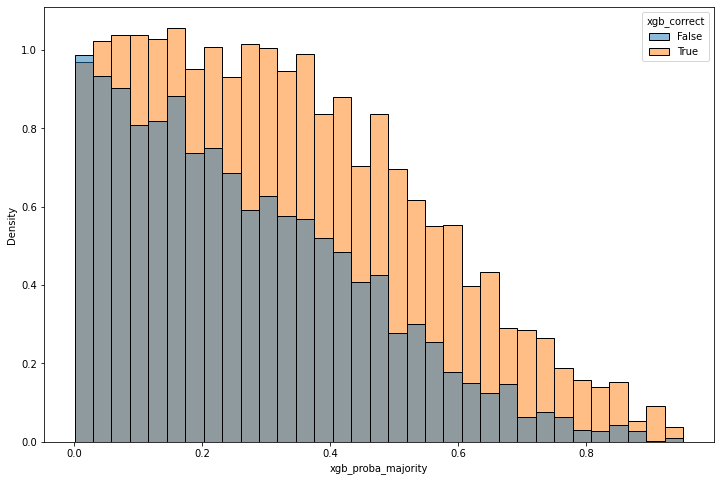

In [121]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='xgb_proba_majority', hue='xgb_correct', stat='density');

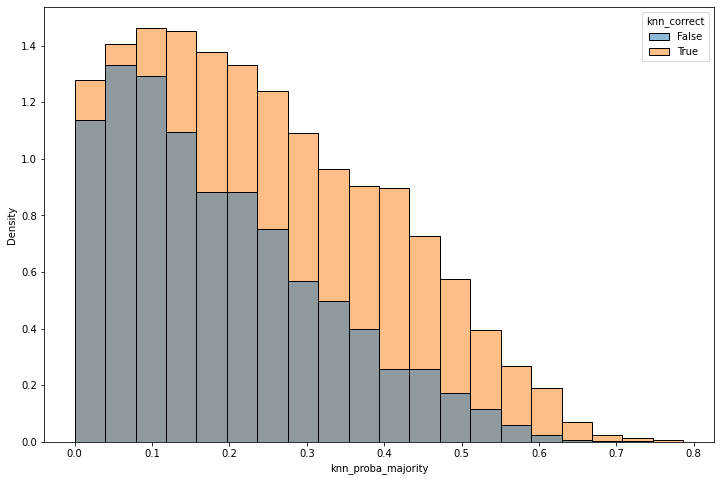

In [122]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='knn_proba_majority', hue='knn_correct', stat='density', bins=20);

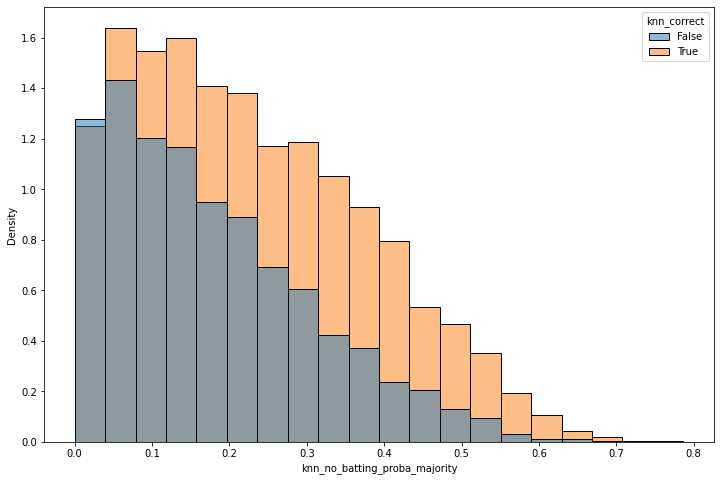

In [123]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='knn_no_batting_proba_majority', hue='knn_correct', stat='density', bins=20);

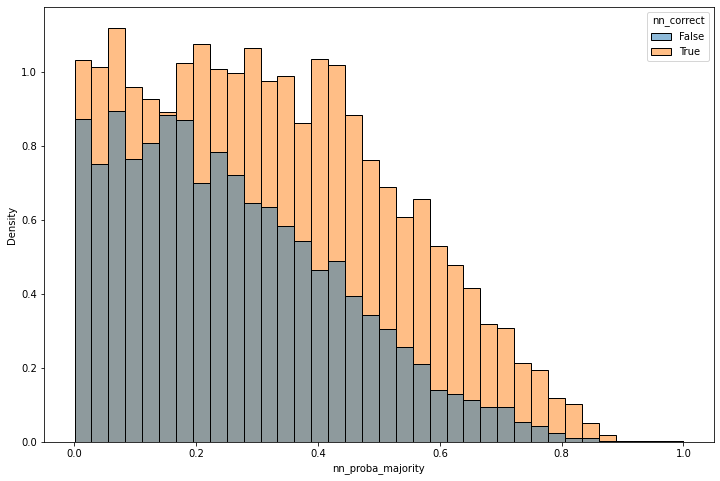

In [124]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='nn_proba_majority', hue='nn_correct', stat='density');

## Agreements and disagreements

Use Morgan's idea of where KNN (no hitting) and the NN disagree and remake the above graphs.

In [125]:
conditions = [(df['knn_no_batting_pred'] != df['nn_pred'])]     #Sets the conditions
choices = [1]
df['mixed_nn_knn'] = np.select(conditions, choices, 0)

conditions = [(df['knn_no_batting_pred'] == df['nn_pred'])]     #Sets the conditions
choices = [1]
df['agree_nn_knn'] = np.select(conditions, choices, 0)

disagree_df = df[df['mixed_nn_knn'] == 1]
agree_df = df[df['agree_nn_knn'] == 1]

In [130]:
disagree_df.head()

,Y,M,home_team,away_team,home_elo,away_elo,home_avg,away_avg,home_obp,away_obp,...,xgb_correct,knn_correct,knn_no_batting_correct,nn_correct,xgb_proba_majority,knn_proba_majority,knn_no_batting_proba_majority,nn_proba_majority,mixed_nn_knn,agree_nn_knn
0,2016,4,PIT,SLN,1533.1644,1526.7958,0.252810,0.246971,0.317378,0.316181,...,False,False,False,True,0.094638,0.000000,0.000000,0.231988,1,0
2,2016,4,KCA,NYN,1542.5957,1524.7207,0.262548,0.239915,0.317525,0.307705,...,True,False,False,True,0.259434,0.000000,0.000000,0.177770,1,0
5,2016,4,ARI,COL,1496.8322,1477.1567,0.256661,0.259474,0.317551,0.309843,...,False,False,False,True,0.137382,0.093333,0.093333,0.069340,1,0
6,2016,4,TBA,TOR,1506.8030,1544.9601,0.246346,0.260793,0.309376,0.332750,...,True,False,False,True,0.039595,0.040000,0.013333,0.008655,1,0
8,2016,4,CIN,PHI,1469.5746,1468.9253,0.241693,0.242109,0.306462,0.296102,...,True,True,True,False,0.166141,0.066667,0.053333,0.193895,1,0


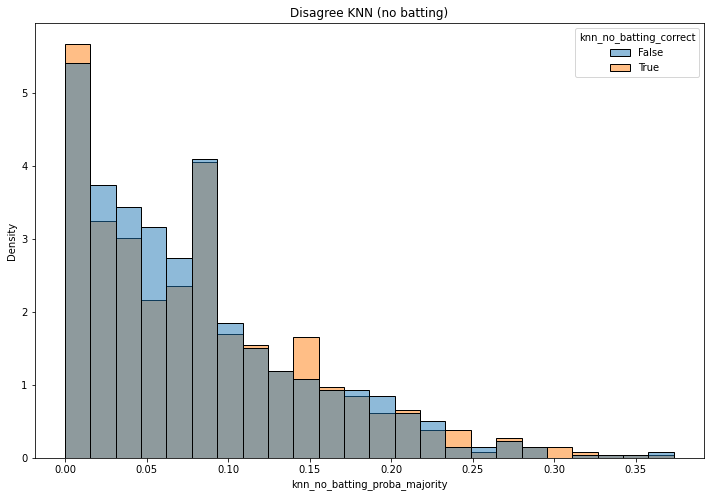

In [132]:
plt.figure(figsize=(12, 8))
sns.histplot(data=disagree_df, x='knn_no_batting_proba_majority', hue='knn_no_batting_correct', stat='density')
plt.title('Disagree KNN (no batting)');

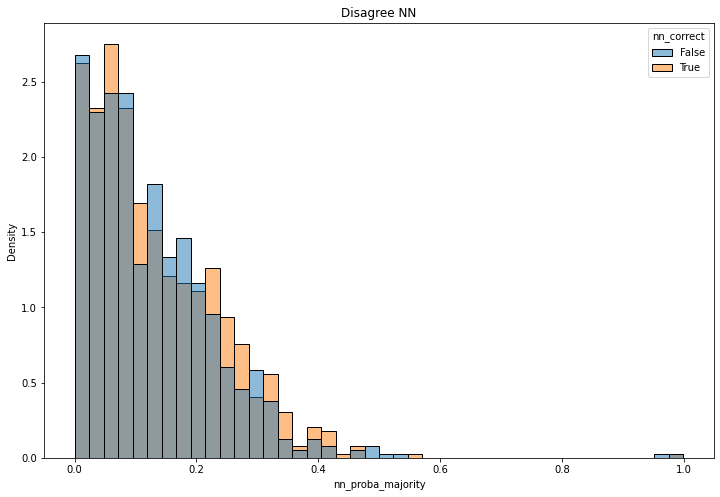

In [133]:
plt.figure(figsize=(12, 8))
sns.histplot(data=disagree_df, x='nn_proba_majority', hue='nn_correct', stat='density')
plt.title('Disagree NN');

A quick attempt at splitting out the main hitting and pitching columns. If this approach shows promise, ask Morgan to do this more carefully.

In [184]:
hitting_cols = ['team_avg_pct_diff', 'team_obp_pct_diff', 'team_slg_pct_diff', 'team_ops_pct_diff']
pitching_cols = [c for c in disagree_df.columns if '_pitcher_' in c]
pitching_cols += [c for c in disagree_df.columns if '_WHIP_' in c]
pitching_cols += [c for c in disagree_df.columns if '_ERA_' in c]
pitching_cols = [c for c in pitching_cols if c.endswith('_pct_diff')]
pitching_cols = list(set(pitching_cols))

In [240]:
hitting_cols

['team_avg_pct_diff',
 'team_obp_pct_diff',
 'team_slg_pct_diff',
 'team_ops_pct_diff']

In [242]:
pitching_cols

['pitcher_WHIP_pct_diff',
 'pitcher_ERA_pct_diff',
 'team_WHIP_pct_diff',
 'team_ERA_pct_diff']

When the two models disagree, how many of the hitting columns are positive (when the home team wins, or negative when the away team wins)? What about the same for pitching columns? Compare the percentages over all games (regardless of if the models agreed or not) versus just games where the models disagreed.

In [245]:
all_games_hitting = (df[(df['home_win'] == 1)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
all_games_hitting.name = 'all_games_hitting'

In [246]:
disagree_games_hitting = (disagree_df[(disagree_df['home_win'] == 1)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_hitting.name = 'disagree_games_hitting'

In [247]:
disagree_games_hitting_knn_correct = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['knn_no_batting_correct'] == True)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_hitting_knn_correct.name = 'disagree_games_hitting_knn_correct'

In [248]:
disagree_games_hitting_nn_correct = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['nn_correct'] == True)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_hitting_nn_correct.name = 'disagree_games_hitting_nn_correct'

In [249]:
stats_df = pd.merge(all_games_hitting, disagree_games_hitting, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_hitting_knn_correct, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_hitting_nn_correct, left_index=True, right_index=True)

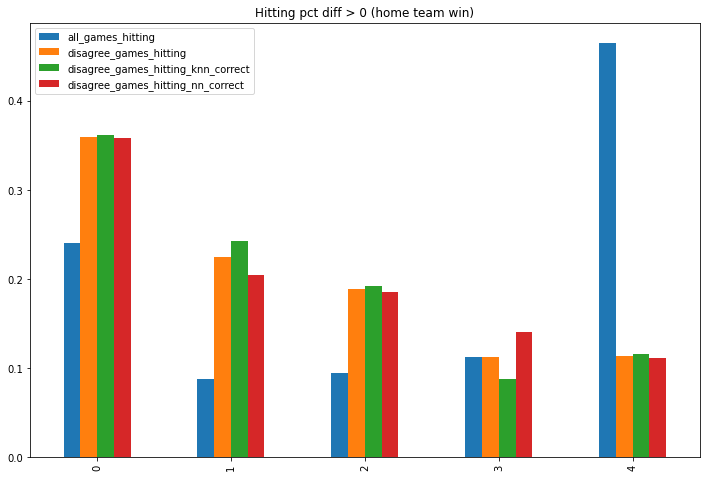

In [250]:
stats_df.plot(kind='bar', figsize=(12, 8), title='Hitting pct diff > 0 (home team win)');

Repeat it for the pitching columns.

In [233]:
all_games_pitching = (df[(df['home_win'] == 1)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
all_games_pitching.name = 'all_games_pitching'

In [234]:
disagree_games_pitching = (disagree_df[(disagree_df['home_win'] == 1)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_pitching.name = 'disagree_games_pitching'

In [235]:
disagree_games_pitching_knn_correct = (disagree_df[(disagree_df['home_win'] == 0) & (disagree_df['knn_no_batting_correct'] == True)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_pitching_knn_correct.name = 'disagree_games_pitching_knn_correct'

In [236]:
disagree_games_pitching_nn_correct = (disagree_df[(disagree_df['home_win'] == 0) & (disagree_df['nn_correct'] == True)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_pitching_nn_correct.name = 'disagree_games_pitching_nn_correct'

In [237]:
stats_df = pd.merge(all_games_pitching, disagree_games_pitching, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_pitching_knn_correct, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_pitching_nn_correct, left_index=True, right_index=True)

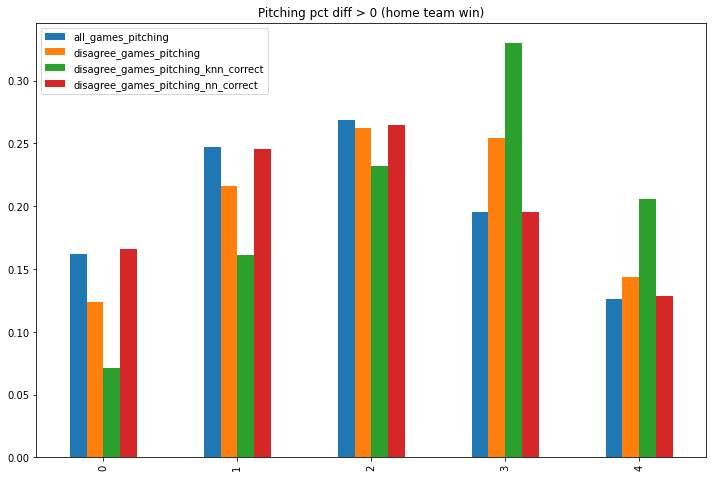

In [239]:
stats_df.plot(kind='bar', figsize=(12, 8), title='Pitching pct diff > 0 (home team win)');

In [280]:
def compare_col_signs(col, positive_favors_home=True):
    if not isinstance(col, list):
        col = [col]
    if positive_favors_home:
        all_games = (df[(df['home_win'] == 1)][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        all_games.name = 'all_games'
        disagree_games = (disagree_df[(disagree_df['home_win'] == 1)][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games.name = 'disagree_games'
        disagree_games_knn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['knn_no_batting_correct'])][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_knn.name = 'disagree_games_knn_correct'
        disagree_games_nn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['nn_correct'])][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_nn.name = 'disagree_games_nn_correct'
        stats_df = pd.merge(all_games, disagree_games, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_knn, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_nn, left_index=True, right_index=True)
        stats_df.plot(kind='bar', figsize=(12, 8))
    else:
        all_games = (df[(df['home_win'] == 1)][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        all_games.name = 'all_games'
        disagree_games = (disagree_df[(disagree_df['home_win'] == 1)][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games.name = 'disagree_games'
        disagree_games_knn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['knn_no_batting_correct'])][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_knn.name = 'disagree_games_knn_correct'
        disagree_games_nn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['nn_correct'])][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_nn.name = 'disagree_games_nn_correct'
        stats_df = pd.merge(all_games, disagree_games, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_knn, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_nn, left_index=True, right_index=True)
        stats_df.plot(kind='bar', figsize=(12, 8))

In [281]:
pct_diff_cols = [c for c in disagree_df.columns if c.endswith('_pct_diff')]
pct_diff_reverse_cols = ['pitcher_WHIP_pct_diff', 'team_Rank_pct_diff', 
                         'team_WHIP_pct_diff', 'team_ERA_pct_diff', 'pitcher_ERA_pct_diff',
                         'team_RA_pct_diff']
for c in pct_diff_reverse_cols:
    pct_diff_cols.remove(c)

In [282]:
pct_diff_cols

['elo_pct_diff',
 'team_avg_pct_diff',
 'team_obp_pct_diff',
 'team_slg_pct_diff',
 'pitcher_IP_pct_diff',
 'team_W-L_pct_diff',
 'team_ops_pct_diff',
 'team_RD_pct_diff',
 'team_FP_pct_diff',
 'team_R_pct_diff',
 'team_bayes_pct_diff',
 'team_pytha_pct_diff']

In [283]:
pct_diff_reverse_cols

['pitcher_WHIP_pct_diff',
 'team_Rank_pct_diff',
 'team_WHIP_pct_diff',
 'team_ERA_pct_diff',
 'pitcher_ERA_pct_diff',
 'team_RA_pct_diff']

In [284]:
hitting_cols = ['team_avg_pct_diff', 'team_obp_pct_diff', 
                'team_slg_pct_diff', 'team_ops_pct_diff']

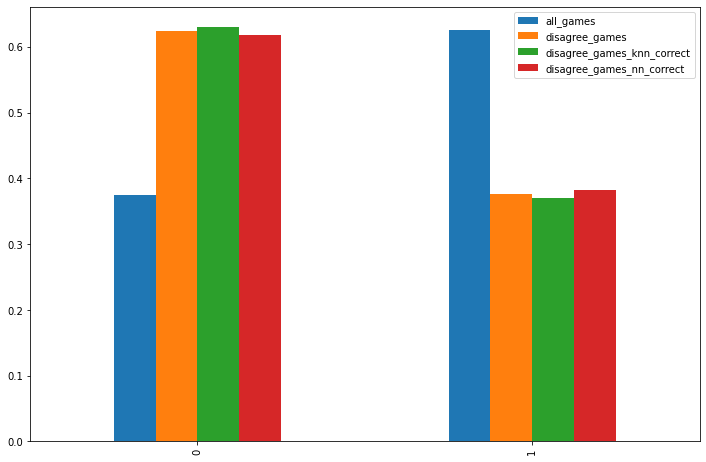

In [285]:
compare_col_signs('team_obp_pct_diff')

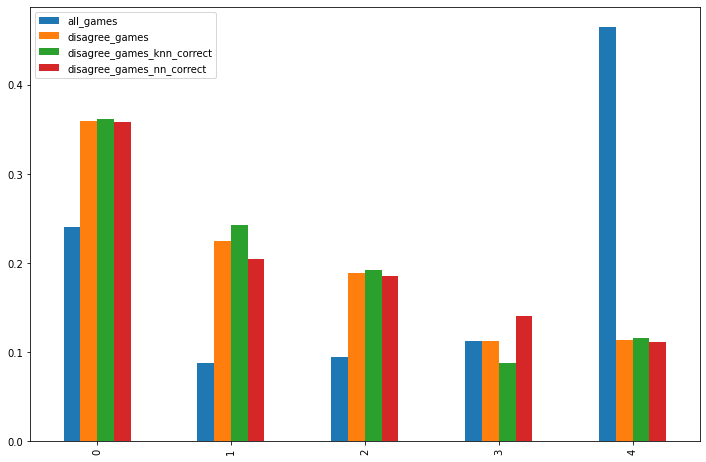

In [286]:
compare_col_signs(hitting_cols)

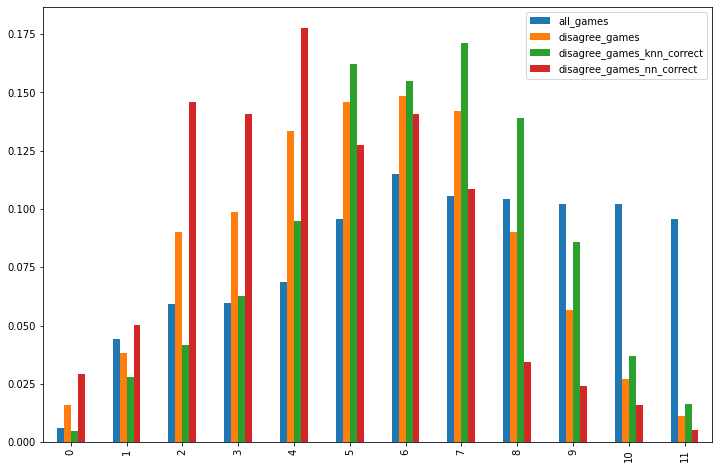

In [287]:
compare_col_signs(pct_diff_cols)

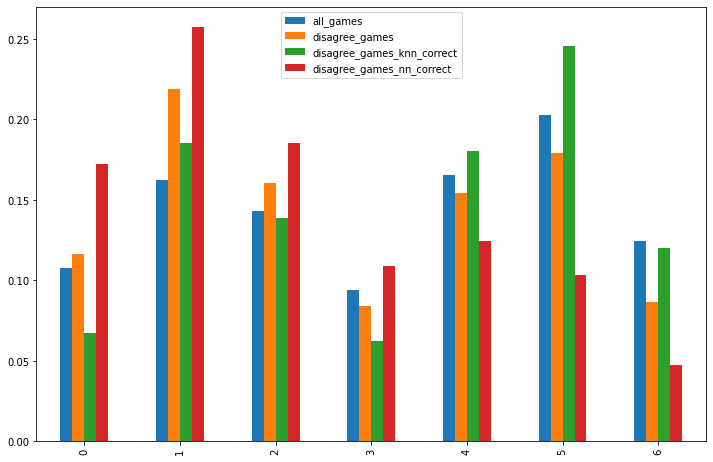

In [288]:
compare_col_signs(pct_diff_reverse_cols, positive_favors_home=False)